# Sentiment Classification in Python
In this notebook we are going to implement a LSTM model to perform classification of reviews. We are going to perform binary classification i.e. we will classify the reviews as positive or negative according to the sentiment.

## Recurrent Neural Network
- Neural Networks are set of algorithms which closely resembles the human brain and are designed to recognize patterns.
- Recurrent Neural Network is a generalization of feedforward neural network that has an internal memory.
- RNN is recurrent in nature as it performs the same function for every input of data while the output of the current input depends on the past one computation.
- After producing the output, it is copied and sent back into the recurrent network. For making a decision, it considers the current input and the output that it has learned from the previous input.
- In other neural networks, all the inputs are independent of each other. But in RNN, all the inputs are related to each other.
## Long Short Term Memory
- Long Short-Term Memory (LSTM) networks are a modified version of recurrent neural networks, which makes it easier to remember past data in memory.
- Generally LSTM is composed of a cell (the memory part of the LSTM unit) and three “regulators”, usually called gates, of the flow of information inside the LSTM unit: an input gate, an output gate and a forget gate.
- Intuitively, the cell is responsible for keeping track of the dependencies between the elements in the input sequence.
- The input gate controls the extent to which a new value flows into the cell, the forget gate controls the extent to which a value remains in the cell and the output gate controls the extent to which the value in the cell is used to compute the output activation of the LSTM unit.
- The activation function of the LSTM gates is often the logistic sigmoid function.
- There are connections into and out of the LSTM gates, a few of which are recurrent. The weights of these connections, which need to be learned during training, determine how the gates operate.


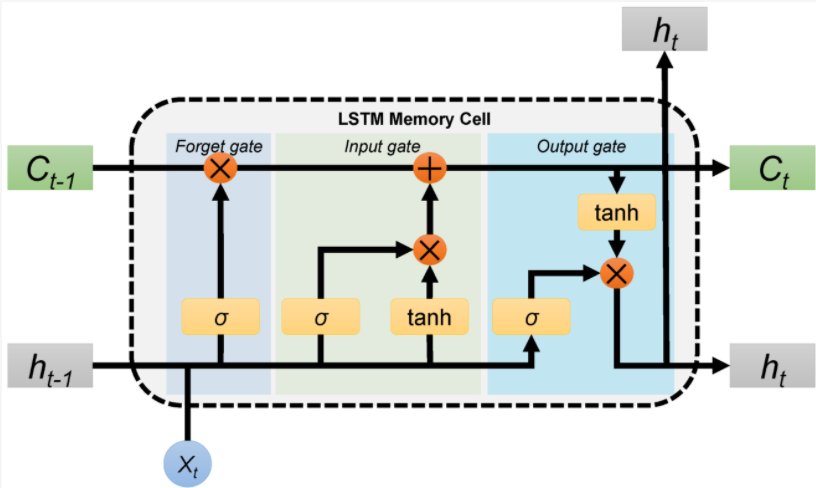

## Dataset
The dataset contains 25,000 tweets for natural language processing or Text analytics. It has two columns-tweet and class. The tweet contains the actual tweet and the class tells us whether the tweet is extremist or non-extremeist. 
Instead of downloading the dataset we will be directly using the IMDB dataset provided by keras.
## Word to Vector
Computers do not understand human language. They require numbers to perform any sort of job. Hence in NLP, all the data has to be converted to numerical form before processing.

As given in the diagram the sentence is first split into words.
Then a vocabluary is created of the words in the entire data set.
Then the words are encoded using a sparse matrix.
Sparse matrix is a matrix in which most of the elements are 0.


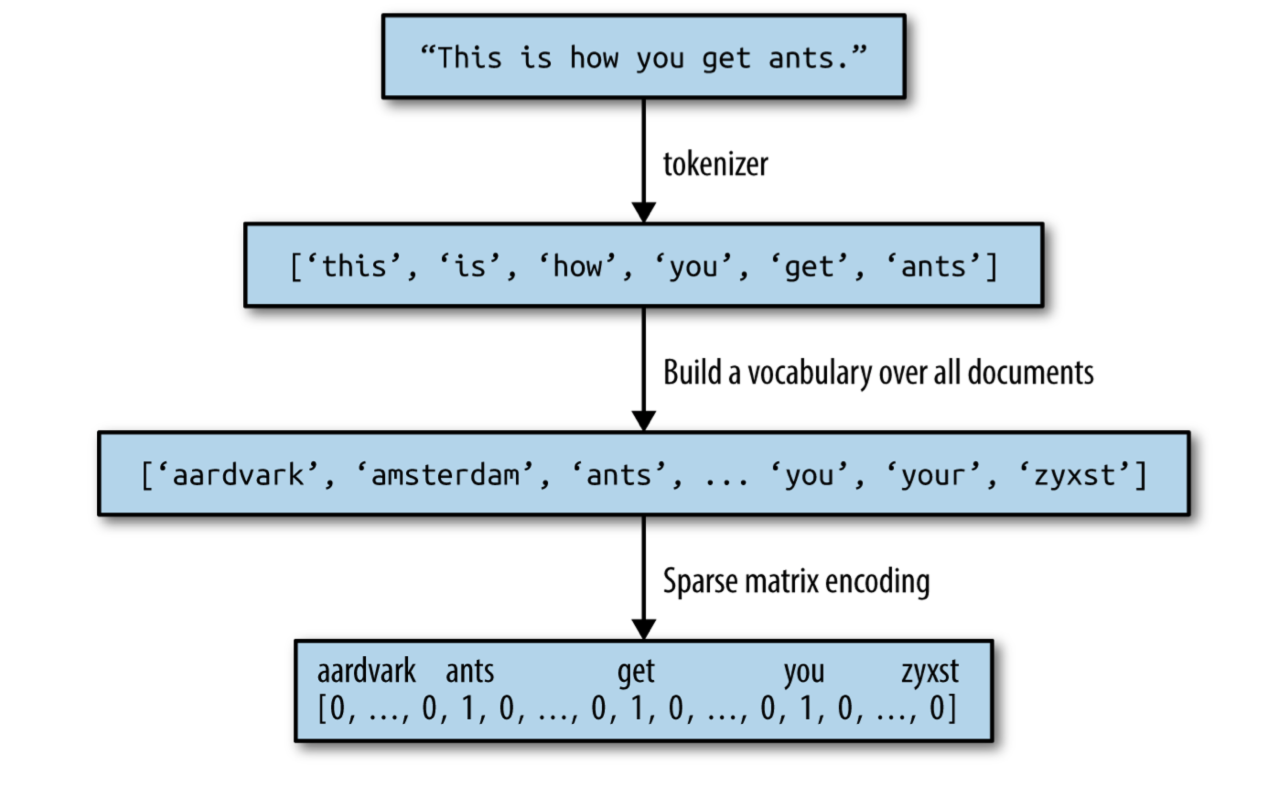

The necessary python libraries are imported here-

- numpy is used to perform basic array operations
- pyplot from matplotlib is used to visualize the results
- Tensorflow is used to build the neural network

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences

In [43]:
tf.__version__

'2.8.2'

## Dataset preprocessing
`imdb.load_data()` returns a Tuple of Numpy arrays for training and testing: `(x_train, y_train), (x_test, y_test)`

`x_train, x_test`: lists of sequences, which are lists of indexes (integers)

`y_train, y_test`: lists of integer labels (1 or 0)

We have set `num_words` to 20000. Hence only 20000 most frequent words are kept. The maximum possible index value is num_words – 1

In [3]:
import pandas as pd
df = pd.read_excel("randomtweets.xlsx")
df.columns=["tweet","class"]
df

,tweet,class
0,End result of systematic brain washing introdu...,1.0
1,Our first ever youtube video is live! Hit us u...,0.0
2,Mumbai Indians: #RohitSharma is a pretty popul...,0.0
3,RT @RamiAlLolah: Wow. 2nd fighter jet downed n...,1.0
4,دَولةُ الإسلام قامَت بِجهاد المُتّقين\n\nوأعاد...,1.0
...,...,...
25532,#BreakingNews:2 explosions have been heard at#...,1.0
25533,LIVE #IPLT20: Basics of #IPL format &amp; #SRH...,0.0
25534,RT @avadhaar: #Theri #Dhoni 😁👌\n\n50Days For T...,0.0
25535,RT @BilalS158: And a captain's knock in the tr...,0.0


Here we can see that `X_train` is an array of lists where each list represents a review. We can see that the lengths of each review is different

In [4]:
X_train = df["tweet"]
Y_train = df["class"]

In [5]:
Y_train = Y_train.astype(int)
Y_train

0        1
1        0
2        0
3        1
4        1
        ..
25532    1
25533    0
25534    0
25535    0
25536    1
Name: class, Length: 25537, dtype: int64

The length of all the reviews must be same before feeding them to the neural network. Hence we are using `pad_sequences` which pads zeros to reviews with length less than 100.

In [6]:
from keras.preprocessing.text import one_hot
vocab_size=30000
encoded_text = [one_hot(i, vocab_size) for i in X_train]
X_train = encoded_text


X_train = pad_sequences(X_train, maxlen = 50, padding="post")
# X_test = pad_sequences(X_test, maxlen=100)

In [ ]:
encoded_text

We can see that `X_train` has 25000 rows and 100 columns i.e. it has 25000 reviews each with length 200

In [8]:
X_train.shape

(25537, 50)

In [9]:
vocab_size = 30000
embed_size = 128

## Build LSTM Network
Here we are importing the necessary layers to build out neural network



In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding


Our sequential model consists of 3 layers.

### Embedding layer:
The Embedding layer is initialized with random weights and will learn an embedding for all of the words in the training dataset. It requires 3 arguments:

`input_dim`: This is the size of the vocabulary in the text data which is 20000 in this case.

`output_dim`: This is the size of the vector space in which words will be embedded. It defines the size of the output vectors from this layer for each word.

`input_shape`: This is the shape of the input which we have to pass as a parameter to the first layer of our neural network.
### LSTM layer:
This is the main layer of the model. It learns long-term dependencies between time steps in time series and sequence data.

### Dense layer:
Dense layer is the regular deeply connected neural network layer. It is most common and frequently used layer. We have number of `units` as 1 because the output of this classification is binary which can be represented using either 0 or 1. `Sigmoid` function is used because it exists between (0 to 1) and this facilitates us to predict a binary output.

In [11]:
model = Sequential()
model.add(Embedding(vocab_size, embed_size, input_shape = (X_train.shape[1],)))
model.add(LSTM(units=60, activation='tanh'))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 128)           3840000   
                                                                 
 lstm (LSTM)                 (None, 60)                45360     
                                                                 
 dense (Dense)               (None, 1)                 61        
                                                                 
Total params: 3,885,421
Trainable params: 3,885,421
Non-trainable params: 0
_________________________________________________________________


- After compiling the model we will now train the model using `model.fit()` on the training dataset.
- We will use 5 `epochs` to train the model. An epoch is an iteration over the entire x and y data provided.
-`batch_size` is the number of samples per gradient update i.e. the weights will be updates after 128 training examples.
- `validation_data` is the data on which to evaluate the loss and any model metrics at the end of each epoch. The model will not be trained on this data.


In [13]:
history = model.fit(X_train, Y_train,validation_split = 0.2, epochs=5, batch_size=128)

Epoch 1/5
160/160 [==============================] - 24s 136ms/step - loss: 0.3140 - accuracy: 0.8605 - val_loss: 0.1754 - val_accuracy: 0.9548
Epoch 2/5
160/160 [==============================] - 21s 133ms/step - loss: 0.0647 - accuracy: 0.9872 - val_loss: 0.0721 - val_accuracy: 0.9853
Epoch 3/5
160/160 [==============================] - 21s 132ms/step - loss: 0.0103 - accuracy: 0.9984 - val_loss: 0.0111 - val_accuracy: 0.9977
Epoch 4/5
160/160 [==============================] - 21s 133ms/step - loss: 0.0029 - accuracy: 0.9995 - val_loss: 0.0130 - val_accuracy: 0.9977
Epoch 5/5
160/160 [==============================] - 21s 133ms/step - loss: 8.8654e-04 - accuracy: 1.0000 - val_loss: 0.0158 - val_accuracy: 0.9975


`history` gives us the summary of all the accuracies and losses calculated after each epoch



In [ ]:
history.history

In [56]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

ValueError: ignored

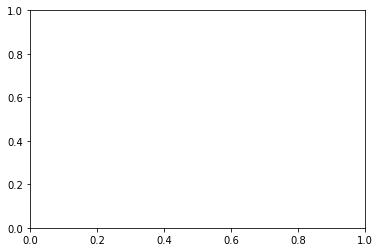

In [58]:
plot_learningCurve(history, 5)